## Getting to Know a Dataset 

## Work By-
Ravjot Singh

LinkedIn: https://www.linkedin.com/in/ravjot03/

Github: https://github.com/Ravjot03

Medium: https://ravjot03.medium.com/

E-Mail: ravjot313@gmail.com

Mobile: +1(341)-345-1373 (USA)

Location: San Francisco, California, USA

Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Loading the dataset

In [2]:
df = pd.read_csv('clean_unemployment.csv')

A. Initial Exploration of data

In [3]:
# print the first five rows of the dataset
df.head()

,country_code,country_name,continent,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,AFG,Afghanistan,Asia,11.35,11.05,11.34,11.19,11.14,11.13,11.16,11.18,11.15,11.22,11.71,13.28
1,AGO,Angola,Africa,9.43,7.36,7.35,7.37,7.37,7.39,7.41,7.41,7.42,7.42,8.33,8.53
2,ALB,Albania,Europe,14.09,13.48,13.38,15.87,18.05,17.19,15.42,13.62,12.30,11.47,13.33,11.82
3,ARE,United Arab Emirates,Asia,2.48,2.30,2.18,2.04,1.91,1.77,1.64,2.46,2.35,2.23,3.19,3.36
4,ARG,Argentina,South America,7.71,7.18,7.22,7.10,7.27,7.52,8.11,8.35,9.22,9.84,11.46,10.90


In [4]:
# prints the shape of the dataset
df.shape

(182, 15)

In [5]:
# prints a summary of non-missing values and data types in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 182 entries, 0 to 181
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   country_code  182 non-null    object 
 1   country_name  182 non-null    object 
 2   continent     177 non-null    object 
 3   2010          182 non-null    float64
 4   2011          182 non-null    float64
 5   2012          182 non-null    float64
 6   2013          182 non-null    float64
 7   2014          182 non-null    float64
 8   2015          182 non-null    float64
 9   2016          182 non-null    float64
 10  2017          182 non-null    float64
 11  2018          182 non-null    float64
 12  2019          182 non-null    float64
 13  2020          182 non-null    float64
 14  2021          182 non-null    float64
dtypes: float64(12), object(3)
memory usage: 21.5+ KB


In [6]:
# prints the summary statistics (count, mean, standard deviation, min, max, and quartile values)
# of each numerical column in the dataset
df.describe()

,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
count,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000
mean,8.409286,8.315440,8.317967,8.344780,8.179670,8.058901,7.925879,7.668626,7.426429,7.243736,8.420934,8.390879
std,6.248887,6.266795,6.367270,6.416041,6.284241,6.161170,6.045439,5.902152,5.818915,5.696573,6.040915,6.067192
min,0.450000,0.320000,0.480000,0.250000,0.200000,0.170000,0.150000,0.140000,0.110000,0.100000,0.210000,0.260000
25%,4.015000,3.775000,3.742500,3.692500,3.625000,3.662500,3.800000,3.690000,3.625000,3.487500,4.285000,4.335000
50%,6.965000,6.805000,6.690000,6.395000,6.450000,6.170000,5.925000,5.650000,5.375000,5.240000,6.695000,6.425000
75%,10.957500,11.045000,11.285000,11.310000,10.695000,10.215000,10.245000,10.315000,9.257500,9.445000,11.155000,10.840000
max,32.020000,31.380000,31.020000,29.000000,28.030000,27.690000,26.540000,27.040000,26.910000,28.470000,29.220000,33.560000


Conclusion - Our dataset contains 182 rows of data including country_code, country_name, continent, and unemployment percentages from year 2010 to 2021.

B. Counting Categorical Data

In [7]:
# Count the values associated with each continent in the data
df['continent'].value_counts()

continent
Africa           53
Asia             47
Europe           39
North America    18
South America    12
Oceania           8
Name: count, dtype: int64

Global unemployment in 2021

It's time to explore some of the numerical columns in the dataset.

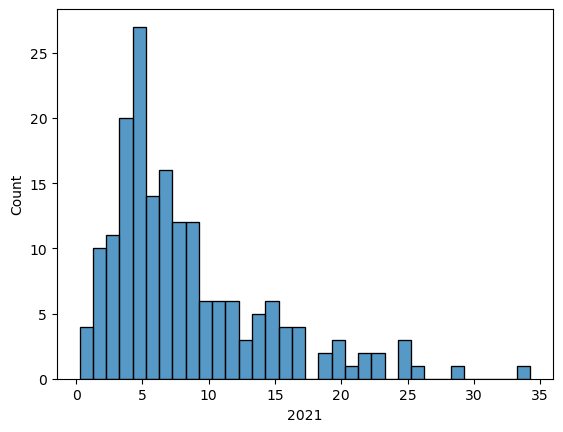

In [8]:
# distribution of 2021 unemployment percentages across all countries in data

sns.histplot(data=df, x='2021', binwidth = 1)
plt.show()

Conclusion - It looks like 2021 unemployment hovered around 3% to 8% for most countries in the dataset, but a few countries experienced very high unemployment of 20% to 35%.

C. Data Validation

Data validation is an important early step in EDA.

We can validate categorical data by comparing values in a column to a list of expected values using .isin(), which can either be applied to a Series as I show here or to an entire DataFrame. 

The function returns a Series of the same size and shape as the original but with True and False in place of all values, depending on whether the value from the original Series was included in the list passed to .isin().

In [9]:
df['continent'].isin(['Oceania'])

0      False
1      False
2      False
3      False
4      False
       ...  
177     True
178    False
179    False
180    False
181    False
Name: continent, Length: 182, dtype: bool

Next task is to use .isin() to identify countries that are not in Oceania. These countries should return True while countries in Oceania should return False. The results of .isin() to quickly filter out Oceania countries using Boolean indexing.

In [10]:
# Define a Series describing whether each continent is outside of Oceania
not_oceania = ~df['continent'].isin(["Oceania"])

In [11]:
# Print all without records related to countries in Oceania
print(df[not_oceania])

    country_code          country_name      continent   2010   2011   2012  \
0            AFG           Afghanistan           Asia  11.35  11.05  11.34   
1            AGO                Angola         Africa   9.43   7.36   7.35   
2            ALB               Albania         Europe  14.09  13.48  13.38   
3            ARE  United Arab Emirates           Asia   2.48   2.30   2.18   
4            ARG             Argentina  South America   7.71   7.18   7.22   
..           ...                   ...            ...    ...    ...    ...   
175          VNM               Vietnam           Asia   1.11   1.00   1.03   
178          YEM           Yemen, Rep.           Asia  12.83  13.23  13.17   
179          ZAF          South Africa         Africa  24.68  24.64  24.73   
180          ZMB                Zambia         Africa  13.19  10.55   7.85   
181          ZWE              Zimbabwe         Africa   5.21   5.37   5.15   

      2013   2014   2015   2016   2017   2018   2019   2020   2

Let's now validate numerical data. We can select and view only the numerical columns in a DataFrame by calling the select_dtypes method and passing "number" as the argument.

In [12]:
df.select_dtypes('number').head()

,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,11.35,11.05,11.34,11.19,11.14,11.13,11.16,11.18,11.15,11.22,11.71,13.28
1,9.43,7.36,7.35,7.37,7.37,7.39,7.41,7.41,7.42,7.42,8.33,8.53
2,14.09,13.48,13.38,15.87,18.05,17.19,15.42,13.62,12.30,11.47,13.33,11.82
3,2.48,2.30,2.18,2.04,1.91,1.77,1.64,2.46,2.35,2.23,3.19,3.36
4,7.71,7.18,7.22,7.10,7.27,7.52,8.11,8.35,9.22,9.84,11.46,10.90


In [13]:
df.describe()

,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
count,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000
mean,8.409286,8.315440,8.317967,8.344780,8.179670,8.058901,7.925879,7.668626,7.426429,7.243736,8.420934,8.390879
std,6.248887,6.266795,6.367270,6.416041,6.284241,6.161170,6.045439,5.902152,5.818915,5.696573,6.040915,6.067192
min,0.450000,0.320000,0.480000,0.250000,0.200000,0.170000,0.150000,0.140000,0.110000,0.100000,0.210000,0.260000
25%,4.015000,3.775000,3.742500,3.692500,3.625000,3.662500,3.800000,3.690000,3.625000,3.487500,4.285000,4.335000
50%,6.965000,6.805000,6.690000,6.395000,6.450000,6.170000,5.925000,5.650000,5.375000,5.240000,6.695000,6.425000
75%,10.957500,11.045000,11.285000,11.310000,10.695000,10.215000,10.245000,10.315000,9.257500,9.445000,11.155000,10.840000
max,32.020000,31.380000,31.020000,29.000000,28.030000,27.690000,26.540000,27.040000,26.910000,28.470000,29.220000,33.560000


It's time to validate our numerical data. Using .describe() that the largest unemployment rate during 2021 was nearly 34 percent, while the lowest was just above zero.

The next task is to get much more detailed information about the range of unemployment data using Seaborn's boxplot.

0.26 33.56


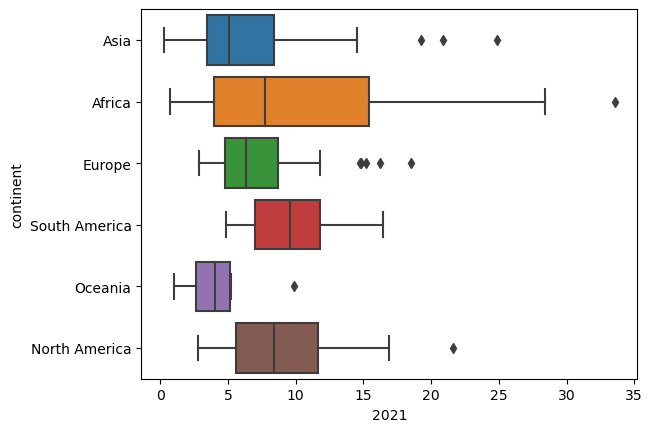

In [14]:
# Print the minimum and maximum unemployment rates during 2021
print(min(df['2021']), max(df['2021']))

# Create a boxplot of 2021 unemployment rates, broken down by continent
sns.boxplot(data=df, x= '2021', y='continent')
plt.show()

D. Data Summarization

Exploring the characteristics of subsets of data further with the help of the .groupby function, which groups data by a given category, allowing to chain an aggregating function like .mean or .count to describe the data within each group. 

Summaries with .groupby() and .agg()

Checking unemployment trends broken down by continent.

In [15]:
# selecting only numeric columns for aggregation
numeric_columns = df.select_dtypes(include='number')

# grouping by 'continent' and calculating mean and std for numeric columns
result = numeric_columns.groupby(df['continent']).agg(['mean', 'std'])
print(result)

                    2010                 2011                 2012            \
                    mean       std       mean       std       mean       std   
continent                                                                      
Africa          9.343585  7.411259   9.369245  7.401556   9.240755  7.264542   
Asia            6.240638  5.146175   5.942128  4.779575   5.835319  4.756904   
Europe         11.008205  6.392063  10.947949  6.539538  11.325641  7.003527   
North America   8.663333  5.115805   8.563333  5.377041   8.448889  5.495819   
Oceania         3.622500  2.054721   3.647500  2.008466   4.103750  2.723118   
South America   6.870833  2.807058   6.518333  2.801577   6.410833  2.936508   

                    2013                 2014            ...      2017  \
                    mean       std       mean       std  ...      mean   
continent                                                ...             
Africa          9.132453  7.309285   9.121321  7.291359  

Named aggregations
Seen above how .groupby() and .agg() can be combined to show summaries across categories. Sometimes, it's helpful to name new columns when aggregating so that it's clear in the code output what aggregations are being applied and where.

In [16]:
continent_summary = df.groupby("continent").agg(
    # Create the mean_rate_2021 column
    mean_rate_2021 = ('2021','mean'),
    # Create the std_rate_2021 column
    std_rate_2021 = ('2021','std'),
)
print(continent_summary)

               mean_rate_2021  std_rate_2021
continent                                   
Africa              10.473585       8.131636
Asia                 6.906170       5.414745
Europe               7.414872       3.947825
North America        9.155000       5.076482
Oceania              4.280000       2.671522
South America        9.924167       3.611624


Visualizing categorical summaries

Seaborn has many great visualizations for exploration, including a bar plot for displaying an aggregated average value by category of data.

In Seaborn, bar plots include a vertical bar indicating the 95% confidence interval for the categorical mean. Since confidence intervals are calculated using both the number of values and the variability of those values, they give a helpful indication of how much data can be relied upon.

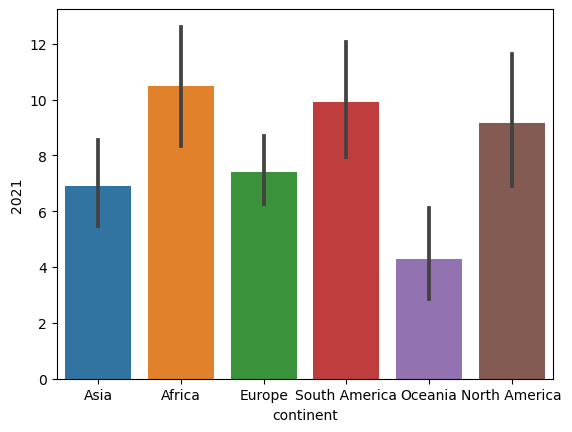

In [17]:
# Create a bar plot of continents and their average unemployment
sns.barplot(data=df, x = 'continent', y='2021')
plt.show()